# Project: Telecom Plan Revenue (Statistical Data Analysis)

## Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

### Recap

The goal of this project is to determine which of Megaline's two prepaid plans (Surf or Ultimate) brings in more revenue by analyzing Megaline's client behavior in terms of calls, messages, and internet used on a monthly basis (via a small 2018 dataset of 500 clients), in order to help the commercial department adjust its advertisting budget. We'll be testing whether or not the average revenue from users of Ultimate and Surf plans differs.

### Stages

The project will be done in the following stages:
1. Data preprocessing
2. Data analysis
3. Test hypotheses
4. Interpret results

## Initialization

In [1]:
# Load all the libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import math

## Load data

In [2]:
# Load the data files into different DataFrames
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')

## Prepare the data

Convert the data to the necessary types and find and eliminate errors in the data.

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The plan data seems pretty straightforward. No issues with the column names, nor obvious duplicate or missing values. But we'll check for both below.

### Find duplicate values

In [5]:
df_plans.duplicated().sum()

0

### Find missing values

In [6]:
df_plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

No duplicate or missing values so we'll skip the step to fix or enrich the data.

## Users

In [7]:
# Print the general/summary information about the users' DataFrame
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


From looking at the initial user data, we see missing values for churn date. Also, the reg and churn dates, respectively, are not in the proper datetime type so we'll want to fix that.

### Find duplicate values

In [9]:
df_users.duplicated().sum()

0

In [10]:
df_users['user_id'].duplicated().sum()

0

### Find missing values

In [11]:
df_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

No duplicate values were found, although we're missing some churn date values. But we are expecting the latter, as it means the calling plan was still active at the time of database extraction. We should address this column next.

### Fix Data

In [12]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], errors='ignore')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


The first few fixes as previously discussed is converting string dates to datetime so that the values can be used for analysis. This is done for reg and churn dates, respectively.

In [13]:
# Create a DataFrame to store only users with a churn date
df_users_with_churn_date = df_users[~df_users['churn_date'].isnull()]

# Calculate user churn date against subscription date and add to new column
df_users['len_of_reg'] = df_users_with_churn_date['churn_date'] - df_users_with_churn_date['reg_date']
df_users['len_of_reg'] = df_users['len_of_reg'].dt.days.astype('Int16')

# If the length of subscription is less than a month (~30 days), drop the user row
df_users = df_users.drop(df_users[df_users['len_of_reg'] < 30].index)

# Remove the churn-related columns
df_users = df_users.drop(columns=['churn_date', 'len_of_reg'], axis=1).reset_index(drop=True)

After that, we leverage users with an existing churn date to filter them out of our users sample. We check for inactive users that have been a subscriber for less than a month and remove them from the data, as we're only concerned with user activity & usage on a monthly basis. No perceived need to enrich the data so we'll skip this step.

## Calls

In [14]:
# Print the general/summary information about the calls' DataFrame
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Print a sample of data for calls
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Call data is looking good. We'll just want to convert the call date values to datetime.

### Find duplicate values

In [16]:
df_calls.duplicated().sum()

0

In [17]:
df_calls['id'].duplicated().sum()

0

### Find missing values

In [18]:
df_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

No initial duplicate or missing values are found.

### Fix data

In [19]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


The main fix for call data as previously discussed is converting string dates to datetime so that the values can be used for analysis.

### Enrich data

In [20]:
df_calls = df_calls.rename(columns={
    'duration': 'call_duration_in_minutes'
})

df_calls['call_duration_in_minutes'] = df_calls['call_duration_in_minutes'].apply(lambda x: math.ceil(x))
df_calls.head()

,id,user_id,call_date,call_duration_in_minutes
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


A minor tweak is to rename the duration column, since the existing name is a bit generic, and then round the values up the next nearest minute (since the plans round seconds up to minutes). We update the name to be more descriptive to include the unit of measurement for call duration, minutes.

## Messages

In [21]:
# Print the general/summary information about the messages' DataFrame
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# Print a sample of data for messages
df_messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Like with some of the previous datasets, we want to convert dates values in the message data under message date to datetime.

### Find duplicate values

In [23]:
df_messages.duplicated().sum()

0

In [24]:
df_messages['id'].duplicated().sum()

0

### Find missing values

In [25]:
df_messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

No initial duplicate or missing values are found.

### Fix data

In [26]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


The main fix for message data as previously discussed is converting string dates to datetime so that the values can be used for analysis. Otherwise, we don't see a need to enrich the data so we'll move on.

## Internet

In [27]:
# Print the general/summary information about the internet DataFrame
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [28]:
# Print a sample of data for the internet traffic
df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Internet data is looking good. We'll just want to convert the session date values to datetime.

### Find duplicate values

In [29]:
df_internet.duplicated().sum()

0

In [30]:
df_internet['id'].duplicated().sum()

0

### Find missing values

In [31]:
df_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

No initial duplicate or missing values are found.

### Fix data

In [32]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


The main fix for internet data as previously discussed is converting string dates to datetime so that the values can be used for analysis. Otherwise, we don't see a need to enrich the data so we'll move on.

## Study plan conditions

In [33]:
# Print out the plan conditions and make sure they are clear for you
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Per project suggestion, now that we've cleaned up our data, next we print out the plan information once again in order to see and compare Ultimate vs. Surf plans as we move onto aggregating all of the data per user and studying user behavior from the aggregation.

## Aggregate data per user

In [34]:
# Calculate the number of calls made by each user per month. Save the result.
df_merged_calls_users = df_calls.merge(
    df_users,
    on='user_id'
)
df_merged_calls_users['month'] = df_merged_calls_users['call_date'].dt.month
user_monthly_calls = df_merged_calls_users.groupby(['user_id', 'month'])['call_date'].count().reset_index()
user_monthly_calls

,user_id,month,call_date
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2248,1498,12,39
2249,1499,9,41
2250,1499,10,53
2251,1499,11,45


We add up the number of calls made by each user per month into `user_monthly_calls`.

In [35]:
# Calculate the amount of minutes spent by each user per month. Save the result.
user_monthly_minutes = df_merged_calls_users.groupby(['user_id', 'month'])['call_duration_in_minutes'].sum().reset_index()
user_monthly_minutes

,user_id,month,call_duration_in_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2248,1498,12,339
2249,1499,9,346
2250,1499,10,385
2251,1499,11,308


Next, we add up the amount of call minutes used by each user per month into `user_monthly_minutes`.

In [36]:
# Calculate the number of messages sent by each user per month. Save the result.
df_merged_messages_users = df_messages.merge(
    df_users,
    on='user_id'
)
df_merged_messages_users['month'] = df_merged_messages_users['message_date'].dt.month
user_monthly_messages = df_merged_messages_users.groupby(['user_id', 'month'])['id'].count().reset_index()
user_monthly_messages

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1797,1496,9,21
1798,1496,10,18
1799,1496,11,13
1800,1496,12,11


Next, we add up the number of messages sent by each user per month into `user_monthly_messages`.

In [37]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
df_merged_internet_users = df_internet.merge(
    df_users,
    on='user_id'
)
df_merged_internet_users['month'] = df_merged_internet_users['session_date'].dt.month
user_monthly_internet = df_merged_internet_users.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
user_monthly_internet

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2267,1498,12,23137.69
2268,1499,9,12984.76
2269,1499,10,19492.43
2270,1499,11,16813.83


Next, we add up the volume of internet traffic used by each user per month into `user_monthly_internet`.

In [38]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
df_monthly_user_consumption = user_monthly_calls.merge(user_monthly_minutes, on=['user_id', 'month']).merge(user_monthly_messages, on=['user_id', 'month']).merge(user_monthly_internet, on=['user_id', 'month'])
df_monthly_user_consumption = df_monthly_user_consumption.rename(columns={
    'call_date': 'call_count',
    'id': 'message_count'
})
df_monthly_user_consumption

,user_id,month,call_count,call_duration_in_minutes,message_count,mb_used
0,1000,12,16,124,11,1901.47
1,1001,8,27,182,30,6919.15
2,1001,9,49,315,44,13314.82
3,1001,10,65,393,53,22330.49
4,1001,11,64,426,36,18504.30
...,...,...,...,...,...,...
1750,1496,9,52,414,21,16389.27
1751,1496,10,46,317,18,14287.36
1752,1496,11,39,308,13,8547.36
1753,1496,12,40,294,11,16438.99


The second to last step is merging all of the data for calls, minutes, messages, and internet traffic by user id and month into `df_monthly_user_consumption`.

In [39]:
# Add the plan information
df_aggregated_user_data = pd.merge(
    df_monthly_user_consumption,
    df_users[['user_id', 'plan']],
    on='user_id')
df_aggregated_user_data

,user_id,month,call_count,call_duration_in_minutes,message_count,mb_used,plan
0,1000,12,16,124,11,1901.47,ultimate
1,1001,8,27,182,30,6919.15,surf
2,1001,9,49,315,44,13314.82,surf
3,1001,10,65,393,53,22330.49,surf
4,1001,11,64,426,36,18504.30,surf
...,...,...,...,...,...,...,...
1750,1496,9,52,414,21,16389.27,surf
1751,1496,10,46,317,18,14287.36,surf
1752,1496,11,39,308,13,8547.36,surf
1753,1496,12,40,294,11,16438.99,surf


Finally, we take all of the merged data by user and month and merge in the plan information per user in `df_aggregated_user_data`.

In [40]:
# Calculate the monthly revenue for each user
def calculate_revenue(row):
    exceeded_minutes_cost = 0
    exceeded_messages_cost = 0
    exceeded_data_cost = 0
    row_mb_used_as_gb = math.ceil(row['mb_used'] / 1024)

    if row['plan'] == 'surf':
        base_monthly_charge = 20

        if row['call_duration_in_minutes'] > 500:
            exceeded_minutes = row['call_duration_in_minutes'] - 500
            exceeded_minutes_cost = math.ceil(exceeded_minutes) * 0.03

        if row['message_count'] > 50:
            exceeded_messages = row['message_count'] - 50
            exceeded_messages_cost = exceeded_messages * 0.03
        
        if row_mb_used_as_gb > 15:
            exceeded_data = row_mb_used_as_gb - 15
            exceeded_data_cost = exceeded_data * 10

        exceeded_monthly_charge = exceeded_minutes_cost + exceeded_messages_cost + exceeded_data_cost
        monthly_revenue = base_monthly_charge + exceeded_monthly_charge
        
        return monthly_revenue

    elif row['plan'] == 'ultimate':
        base_monthly_charge = 70

        if row['call_duration_in_minutes'] > 3000:
            exceeded_minutes = row['call_duration_in_minutes'] - 3000
            exceeded_minutes_cost = math.ceil(exceeded_minutes) * 0.01

        if row['message_count'] > 1000:
            exceeded_messages = row['message_count'] - 1000
            exceeded_messages_cost = exceeded_messages * 0.01

        if row_mb_used_as_gb > 30:
            exceeded_data = row_mb_used_as_gb - 30
            exceeded_data_cost = exceeded_data * 7

        exceeded_monthly_charge = exceeded_minutes_cost + exceeded_messages_cost + exceeded_data_cost
        monthly_revenue = base_monthly_charge + exceeded_monthly_charge
        
        return monthly_revenue

We create the `calculate_revenue` function in order to calculate the revenue generated by each user based on their plan type (Ultimate or Surf) including if they go beyond the base package limits on calls, messages, and internet data.

In [41]:
df_aggregated_user_data['monthly_cost'] = df_aggregated_user_data.apply(calculate_revenue, axis=1)
df_aggregated_user_data

,user_id,month,call_count,call_duration_in_minutes,message_count,mb_used,plan,monthly_cost
0,1000,12,16,124,11,1901.47,ultimate,70.00
1,1001,8,27,182,30,6919.15,surf,20.00
2,1001,9,49,315,44,13314.82,surf,20.00
3,1001,10,65,393,53,22330.49,surf,90.09
4,1001,11,64,426,36,18504.30,surf,60.00
...,...,...,...,...,...,...,...,...
1750,1496,9,52,414,21,16389.27,surf,40.00
1751,1496,10,46,317,18,14287.36,surf,20.00
1752,1496,11,39,308,13,8547.36,surf,20.00
1753,1496,12,40,294,11,16438.99,surf,40.00


Using the function, we add the calculated revenue per user per month to a new DataFrame column in `df_aggregated_user_data` named `monthly_cost`.

## Study user behaviour

### Calls

plan,surf,ultimate
month,,
1,292.000000,197.666667
2,331.200000,486.800000
3,344.937500,415.285714
4,366.228571,322.750000
5,443.981132,410.190476
6,425.514286,370.918919
7,452.101124,439.638298
8,427.873950,436.438596
9,426.020408,437.591549


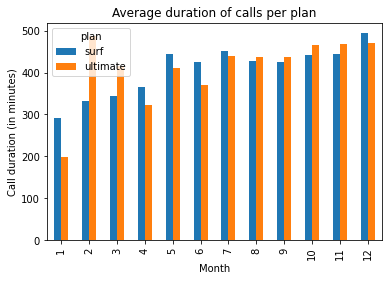

In [42]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.
avg_plan_calls_pivot = df_aggregated_user_data.pivot_table(
    index='month',
    columns='plan',
    values='call_duration_in_minutes'
)

display(avg_plan_calls_pivot)

avg_plan_calls_pivot.plot(kind='bar',
                          xlabel='Month',
                          ylabel='Call duration (in minutes)',
                          title='Average duration of calls per plan')
plt.show()

We plot a bar plot to compare the average duration of calls per plan per each distinct month. Based on the plot, Surf plan users seem to have more of a consistent and gradual increase in call duration over the year. Ultimate plan users seem to have more inconsistent use, including a sudden peak in February. This drops afterwards until the call duration gradually increases again during the second half of the year. Ultimate plan users barely outpace usage by Surf plan users. Surf users have slightly longer call duration vs. Ultimate users by the end of the year.

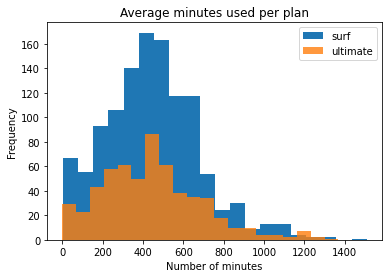

In [43]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
surf_plan_data = df_aggregated_user_data.query('plan == "surf"')
ultimate_plan_data = df_aggregated_user_data.query('plan == "ultimate"')

surf_plan_minutes = surf_plan_data[['month', 'call_duration_in_minutes']]['call_duration_in_minutes']
ultimate_plan_minutes = ultimate_plan_data[['month', 'call_duration_in_minutes']]['call_duration_in_minutes']

surf_plan_minutes.plot(kind='hist',
                       bins=20,
                       title='Average minutes used per plan').set_xlabel('Number of minutes')
ultimate_plan_minutes.plot(kind='hist',
                           bins=20,
                           alpha=0.8)
plt.legend(['surf', 'ultimate'])
plt.show()

Next, we plot a histogram to compare the number of minutes users of each plan require each month, and note that there is a positive skew. First we filter `df_aggregated_user_data` by plan. Based on the plot, both Ultimate and Surf plan users tend to require less number of minutes for calls, although the frequency is greater with the Surf plan. The mean for both plans is similar (>400 minutes).

In [44]:
df_aggregated_user_data

,user_id,month,call_count,call_duration_in_minutes,message_count,mb_used,plan,monthly_cost
0,1000,12,16,124,11,1901.47,ultimate,70.00
1,1001,8,27,182,30,6919.15,surf,20.00
2,1001,9,49,315,44,13314.82,surf,20.00
3,1001,10,65,393,53,22330.49,surf,90.09
4,1001,11,64,426,36,18504.30,surf,60.00
...,...,...,...,...,...,...,...,...
1750,1496,9,52,414,21,16389.27,surf,40.00
1751,1496,10,46,317,18,14287.36,surf,20.00
1752,1496,11,39,308,13,8547.36,surf,20.00
1753,1496,12,40,294,11,16438.99,surf,40.00


In [45]:
# Calculate the mean and the variance of the monthly call duration
var_plan_calls_pivot = df_aggregated_user_data.pivot_table(
    index='month',
    columns='plan',
    values='call_duration_in_minutes',
    aggfunc='var'
)

var_plan_calls_pivot

plan,surf,ultimate
month,,
1,NaN,24754.333333
2,101102.200000,65897.700000
3,43077.929167,61341.904762
4,62626.652101,40850.733333
5,62096.326560,54970.361905
6,48249.180952,39671.021021
7,64931.160112,80879.409806
8,53786.483977,59442.357769
9,46732.033827,63912.673642


Next, we want to look at the mean and variance of call duration to try to determine whether users on the different plans have different behaviors with their calls. Since we already addressed the mean earlier (`avg_plan_calls_pivot`), here we calculate the variance for monthly call duration by plan.

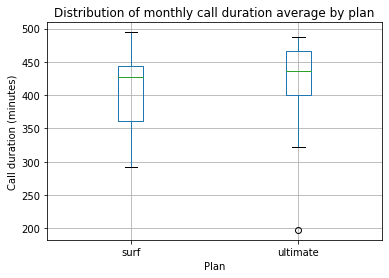

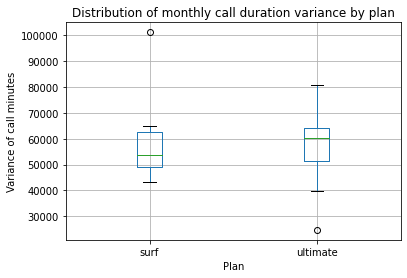

In [46]:
# Plot a boxplot to visualize the distribution of the monthly call duration
avg_plan_calls_pivot.plot(kind='box',
                          grid=True,
                          ylabel='Call duration (minutes)',
                          title='Distribution of monthly call duration average by plan').set_xlabel('Plan')
var_plan_calls_pivot.plot(kind='box',
                          grid=True,
                          ylabel='Variance of call minutes',
                          title='Distribution of monthly call duration variance by plan').set_xlabel('Plan')
plt.show()

Next, we plot boxplots to visualize the distributions for call duration mean (using `avg_plan_calls_pivot`) and variance (using `var_plan_calls_pivot`).

Mean: we see slightly greater variability with Surf plan means as compared to the Ultimate plan. The plots also seem to overlap a bit so we might be able to conclude that the medians aren't too different between the two plans. For the Ultimate plan, there's also an outlier below the minimum value. The Surf plan almost looks to have a normal distribution, although the median is closer to the third quartile. The Ultimate plan has a negative skew.

Variance: the Surf plan contains an outlier outside the upper bounds of the plot, whereas the Ultimate plan is the opposite and contains an outlier outside the lower bounds of the plot. The interquartile ranges look similar, although the median is slightly higher for Ultimate (as compared to Surf). The min and max ranges are closer to the Surf plan's interquartile range, whereas the Ultimate plan has a wider spread on either end from its interquartile range.

#### Summary

Surf plan users are more consistent with their average call durations per month. They're also similar with Ultimate plan users in that they require less number of call minutes. In looking at mean, the range of data is slightly bigger with the Surf plan. In looking at variance, there seems to be slightly less variability with the Surf plan. 

### Messages

plan,surf,ultimate
month,,
1,21.0,21.0
2,22.0,28.0
3,22.0,35.0
4,25.0,29.0
5,34.0,44.0
6,33.0,37.0
7,35.0,41.0
8,37.0,48.0
9,39.0,46.0


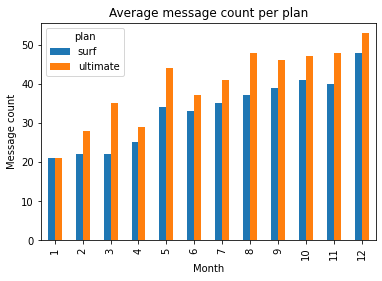

In [47]:
# Compare the number of messages users of each plan tend to send each month
avg_plan_messages_pivot = round(df_aggregated_user_data.pivot_table(
    index='month',
    columns='plan',
    values='message_count'
))

display(avg_plan_messages_pivot)

avg_plan_messages_pivot.plot(kind='bar',
                          xlabel='Month',
                          ylabel='Message count',
                          title='Average message count per plan')
plt.show()

We plot a bar plot to compare the number of messages sent between the two plans each month. Surf and Ultimate both trend up, although Ultimate users consistently take the lead in the amount of messages used per month.

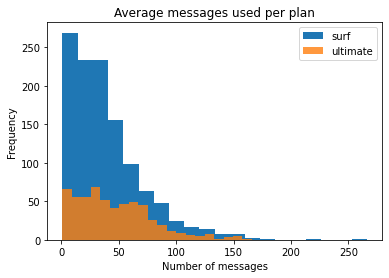

In [48]:
# Compare the number of messages users of each plan require each month. Plot a histogram.
surf_plan_messages = surf_plan_data[['month', 'message_count']]['message_count']
ultimate_plan_messages = ultimate_plan_data[['month', 'message_count']]['message_count']

surf_plan_messages.plot(kind='hist',
                        bins=20,
                        title='Average messages used per plan').set_xlabel('Number of messages')
ultimate_plan_messages.plot(kind='hist',
                            bins=20,
                            alpha=0.8)
plt.legend(['surf', 'ultimate'])
plt.show()

Next, we plot a histogram to compare average messages used per month, and note that there is a positive skew. Based on the plot, we see that both Surf and Ultimate plan users tend to require less messages a month, although the frequency is much more drastically skewed for the Surf plan. Both plans don't seem to require a larger number of messages for users.

In [49]:
# Calculate the mean and the variance of the monthly messages count
var_plan_messages_pivot = df_aggregated_user_data.pivot_table(
    index='month',
    columns='plan',
    values='message_count',
    aggfunc='var'
)

var_plan_messages_pivot

plan,surf,ultimate
month,,
1,NaN,310.333333
2,512.800000,529.700000
3,352.062500,613.904762
4,539.751261,512.862500
5,888.675617,1246.933333
6,818.077847,801.731231
7,786.397089,858.084181
8,951.128044,1034.387845
9,897.463610,903.375855


Next, we want to look at the mean and variance of messagess used to try to determine whether users on the different plans have different behaviors with their messages. Since we already addressed the mean earlier (`avg_plan_messages_pivot`), here we calculate the variance for monthly messages used by plan.

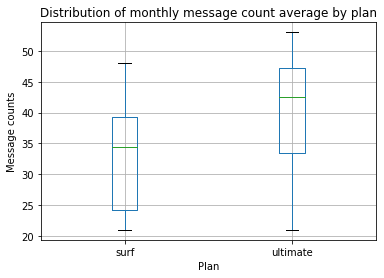

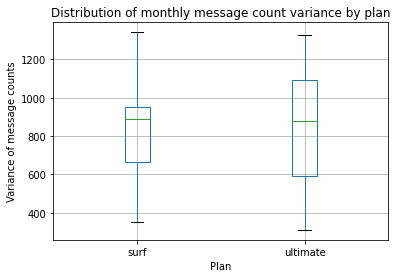

In [50]:
# Plot a boxplot to visualize the distribution of the monthly messages count
avg_plan_messages_pivot.plot(kind='box',
                             grid=True,
                             ylabel='Message counts',
                             title='Distribution of monthly message count average by plan').set_xlabel('Plan')

var_plan_messages_pivot.plot(kind='box',
                             grid=True,
                             ylabel='Variance of message counts',
                             title='Distribution of monthly message count variance by plan').set_xlabel('Plan')
plt.show()

Next, we plot boxplots to visualize the distributions for message count mean (using `avg_plan_messages_pivot`) and variance (using `var_plan_messages_pivot`).

Mean: we see slightly greater variability with Ultimate plan means as compared to the Surf plan. The range is smaller for the Surf plan, although its interquartile range is slightly larger than that of the Ultimate plan. Overall, the distribution and median for the Surf plan is lower than that of the Ultimate plan. The Surf plan skews positive while the Ultimate plan skews negative.

Variance: the distribution of the ranges for each plan is almost identical, altough the Surf plan's interquartile range is smaller than the Ultimate plan's. The medians are almost the same as well.

#### Summary

Both plans tend to not use or require too many messages, although Ultimate plan users use a higher message count month-to-month. Ultimate plan users are more consistent in the amount of messages used while it seems like Surf plan users generally don't need as many massages. 

### Internet

plan,surf,ultimate
month,,
1,7894.790000,6953.200000
2,9310.764000,17335.756000
3,12397.342500,23835.722857
4,11851.091429,14285.791875
5,14851.419623,16993.530000
6,15565.743286,15451.022162
7,16708.588315,16499.324255
8,17161.736891,17976.983333
9,16492.743197,16410.551549


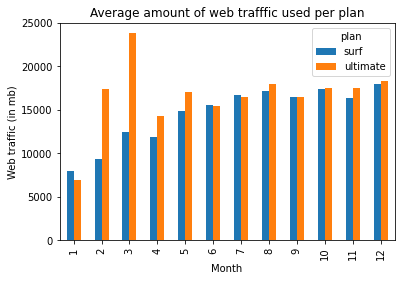

In [51]:
# Compare average amount of internet traffic per each plan per each distinct month. Plot a bar plot to visualize it.
avg_plan_internet_pivot = df_aggregated_user_data.pivot_table(
    index='month',
    columns='plan',
    values='mb_used'
)

display(avg_plan_internet_pivot)

avg_plan_internet_pivot.plot(kind='bar',
                          xlabel='Month',
                          ylabel='Web traffic (in mb)',
                          title='Average amount of web trafffic used per plan')
plt.show()

We plot a bar plot to compare the average about of internet data used per plan per month. We see that there is a substantially large uptick in internet data used between February and March for Ultimate plan users. Otherwise, both plans trend upwards over the year, with the Surf plan average trailing slightly behind the Ultimate plan.

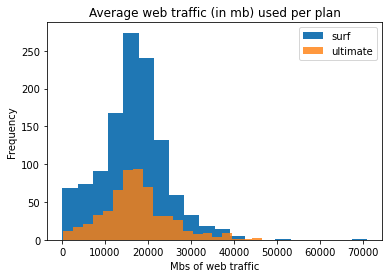

In [52]:
# Compare the amount of internet traffic consumed by users per plan each month. Plot a histogram.
surf_plan_internet = surf_plan_data[['month', 'mb_used']]['mb_used']
ultimate_plan_internet = ultimate_plan_data[['month', 'mb_used']]['mb_used']

surf_plan_internet.plot(kind='hist',
                        bins=20,
                        title='Average web traffic (in mb) used per plan').set_xlabel('Mbs of web traffic')
ultimate_plan_internet.plot(kind='hist',
                            bins=20,
                            alpha=0.8)
plt.legend(['surf', 'ultimate'])
plt.show()

Next, we plot a histogram to compare the average amount of internet data used per plan. We see that both plans have very similar distributions of averages for internet data used (between 15-20 GB). We note that the plot is positively skewed (slightly more so for Ultimate plan users).

In [53]:
# Calculate the mean and the variance of the amount of internet traffic
var_plan_internet_pivot = df_aggregated_user_data.pivot_table(
    index='month',
    columns='plan',
    values='mb_used',
    aggfunc='var'
)

var_plan_internet_pivot

plan,surf,ultimate
month,,
1,NaN,2.458467e+07
2,3.464298e+07,4.820796e+07
3,5.483533e+07,1.042803e+08
4,5.986238e+07,8.914423e+07
5,5.894224e+07,5.887343e+07
6,5.418714e+07,7.458952e+07
7,6.700091e+07,7.117039e+07
8,6.557828e+07,5.675148e+07
9,4.809417e+07,4.268477e+07


Next, we want to look at the mean and variance of internet data used to try to determine whether users on the different plans have different behaviors with their internet usage. Since we already addressed the mean earlier (`avg_plan_internet_pivot`), here we calculate the variance for internet data used by plan.

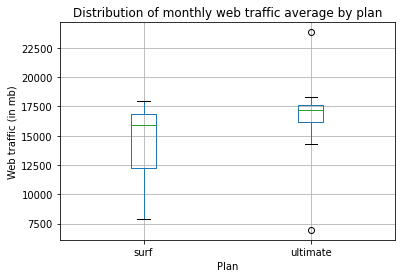

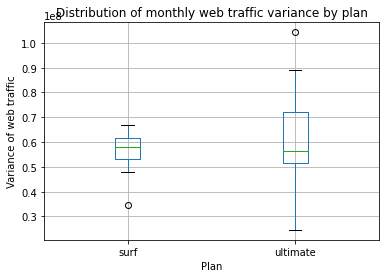

In [54]:
# Plot a boxplot to visualize the distribution of the monthly internet traffic
avg_plan_internet_pivot.plot(kind='box',
                             grid=True,
                             ylabel='Web traffic (in mb)',
                             title='Distribution of monthly web traffic average by plan').set_xlabel('Plan')

var_plan_internet_pivot.plot(kind='box',
                             grid=True,
                             ylabel='Variance of web traffic',
                             title='Distribution of monthly web traffic variance by plan').set_xlabel('Plan')
plt.show()

Next, we plot boxplots to visualize the distributions for call duration mean (using `avg_plan_internet_pivot`) and variance (using `var_plan_internet_pivot`).

Mean: we see much greater variability with the Ultimate plan as compared to the Surf plan. The range is much smaller for the Surf plan. The Surf plan has a larger interquartile range and is negatively skewed. The Ultimate plan does sit at a higher range in internet data used, and looks to be negatively skewed as well. Despite the small size of its interquartile range, it has outliers at both ends much past the minimum and maximum values of its distribution.

Variance: the Ultimate plan has greater variability and a larger interquartile range when compared to the Surf plan. The Surf plan seems to be close to a normal distributon, although it has an outlier beyond its minimal value. On the flip side, the Ultimate plan has an outlier beyond its maximum value.

#### Summary

Both plans have similar internet data usage, although the Ultimate plan tends to use slightly more data on a monthly basis. The Ultimate plan has more consistent average internet data used, whereas the Surf plan has less variance in its internet data consumed.

### Revenue

plan,surf,ultimate
month,,
1,20.000000,70.000000
2,23.914000,70.000000
3,38.540625,78.000000
4,40.591429,73.062500
5,50.857170,71.000000
6,52.081000,72.081081
7,61.806404,72.382979
8,64.383109,72.456140
9,57.196871,71.380282


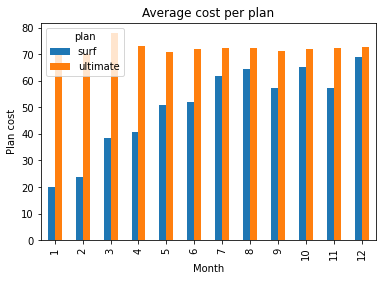

In [55]:
# Compare average monthly cost per each plan per each distinct month. Plot a bar plot to visualize it.
avg_plan_cost_pivot = df_aggregated_user_data.pivot_table(
    index='month',
    columns='plan',
    values='monthly_cost'
)

display(avg_plan_cost_pivot)

avg_plan_cost_pivot.plot(kind='bar',
                          xlabel='Month',
                          ylabel='Plan cost',
                          title='Average cost per plan')
plt.show()

We plot a bar plot to compare the average monthly cost per each plan per month. Based on the plot, we see that the Ultimate plan brings in higher and steadier revenue per month.

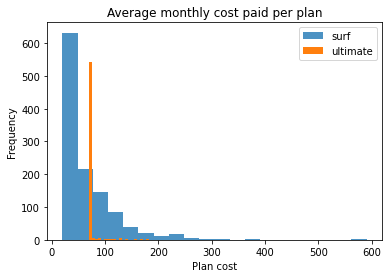

In [56]:
# Compare the cost users of each plan paid each month. Plot a histogram.
surf_plan_cost = surf_plan_data[['month', 'monthly_cost']]['monthly_cost']
ultimate_plan_cost = ultimate_plan_data[['month', 'monthly_cost']]['monthly_cost']

surf_plan_cost.plot(kind='hist',
                    bins=20,
                    alpha=0.8,
                    title='Average monthly cost paid per plan').set_xlabel('Plan cost')
ultimate_plan_cost.plot(kind='hist',
                        bins=20,
                        alpha=1)
plt.legend(['surf', 'ultimate'])
plt.show()

Next, we plot a histogram to compare the cost users of each plan pay each month. Based on the plot, we see for both plans that they are positively skewed. Most Surf plan users pay less than \\$70 per month, whereas Ultimate plan users are mostly and consistently concentrated around the prepaid plan price of \\$70.

In [57]:
# Calculate the mean and the variance of the monthly cost
var_plan_cost_pivot = df_aggregated_user_data.pivot_table(
    index='month',
    columns='plan',
    values='monthly_cost',
    aggfunc='var'
)

var_plan_cost_pivot

plan,surf,ultimate
month,,
1,NaN,0.000000
2,28.746980,0.000000
3,549.488006,235.666667
4,1250.948289,150.062500
5,2308.394898,21.000000
6,2425.189308,94.909910
7,3267.670721,130.545791
8,3335.250428,126.859649
9,2031.352659,52.667606


Next, we want to look at the mean and variance of the monthly cost to try to determine whether users on the different plans have different behaviors with their monthly spending. Since we already addressed the mean earlier (`avg_plan_cost_pivot`), here we calculate the variance for monthly cost by plan.

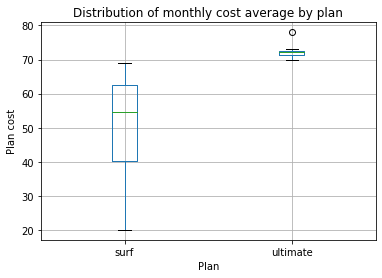

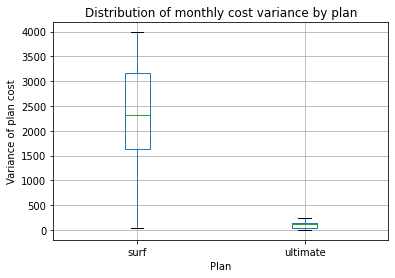

In [58]:
# Plot a boxplot to visualize the distribution of the monthly cost
avg_plan_cost_pivot.plot(kind='box',
                             grid=True,
                             ylabel='Plan cost',
                             title='Distribution of monthly cost average by plan').set_xlabel('Plan')

var_plan_cost_pivot.plot(kind='box',
                             grid=True,
                             ylabel='Variance of plan cost',
                             title='Distribution of monthly cost variance by plan').set_xlabel('Plan')
plt.show()

Next, we plot boxplots to visualize the distribution of the monthly cost for mean (using `avg_plan_cost_pivot`) and variance (using `var_plan_cost_pivot`).

Mean: the Surf plan has much greater variability compared to the Ultimate plan, which mostly concentrated around its median (with the exception of an outlier that's greater than the upper bound. distribution and is negatively skewed. This shows that the Ultimate plan has a high consistency with costing around its prepaid price.

Variance: we see something similar with the second plot, where the Surf plan has a high variability, this time with an almost normal distribution, while the Ultimate plan is clustered closely together with low variance in its costs.

#### Summary

Out of the different datasets looked at so far, the revenue comparisons showed strong trends among the spending behavior of Ultimate plan users. These users consistently paid around the prepaid price each month. Surf plan users seemed to be more cautious with their spending and less risk adverse, given the affordability and flexibility with paying for a cheaper plan.

## Test statistical hypotheses

Our goal is to test and determine which plan (Ultimate vs. Surf) brings in more revenue.

The following are our two hypotheses to be tested. The null hypothesis for each is the hypothesis that nothing between the two populations being look at has changed and that they're equal. Whereas for the alternative hypothesis for each hypothesis, the opposite is true: the two populations being looked at are unequal/changed.

#1: "The average revenue from users of Ultimate and Surf calling plans differs."
* **H₀** (null hypothesis): The average revenue of plans from Ultimate users is equal to the average revenue of plans from Surf users
* **H₁** (alternative hypothesis): The average revenue of plans from Ultimate users does not equal the average revenue of plans from Surf users

#2: "The average revenue from users in NY-NJ area is different from that of the users from other regions."
* **H₀** (null hypothesis): The average revenue of users in the NY-NJ area is equal to the average revenue of users from other regions
* **H₁** (alternative hypothesis): The average revenue of users in the NY-NJ area does not equal the average revenue of users from other regions

For the t-tests, we'll the method (`ttest_ind`) to calculate the means of our two independent plan samples. This is to test each of our null hypotheses against the two samples having equal average values. We will also integrate a `levene` test ahead of the t-test in order to calculate and determine whether or not we're working with equal population variance, which is parameter that will be used as part of the t-test.

In [59]:
# Prepare the data
df_user_cities = df_users[['user_id', 'city']]

df_updated_aggregated_user_data = df_aggregated_user_data.merge(
    df_user_cities,
    on='user_id'
)

df_updated_aggregated_user_data.head()

,user_id,month,call_count,call_duration_in_minutes,message_count,mb_used,plan,monthly_cost,city
0,1000,12,16,124,11,1901.47,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27,182,30,6919.15,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49,315,44,13314.82,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65,393,53,22330.49,surf,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64,426,36,18504.30,surf,60.00,"Seattle-Tacoma-Bellevue, WA MSA"


One last step before testing the hypotheses is making sure to prepare the data to be used by merging in user cities. Now we're ready to test.

In [61]:
# Test the hypotheses
plan_hypothesis_ultimate_sample = df_updated_aggregated_user_data.query('plan == "ultimate"')['monthly_cost']
plan_hypothesis_surf_sample = df_updated_aggregated_user_data.query('plan == "surf"')['monthly_cost']

def t_test(sample_1, sample_2, alpha=0.05):
    pvalue_levene = stats.levene(sample_1, sample_2).pvalue
    
    if pvalue_levene < alpha:
        var_option = False
    else:
        var_option = True
    
    pvalue = stats.ttest_ind(sample_1, sample_2, nan_policy='omit', equal_var=var_option).pvalue
    
    if pvalue < alpha:
        print('We reject the null hypothesis: the average of the first sample is not equal to the average of the second sample')
    else:
        print('We can\'t reject the null hypothesis: we don\'t have enough evidence to say that the averages of the first sample and the averages the second sample are not the same')

t_test(plan_hypothesis_ultimate_sample, plan_hypothesis_surf_sample)

We reject the null hypothesis: the average of the first sample is not equal to the average of the second sample


For the first test, the results confirm statistical difference between the plans and their revenue. So the average revenue from users of Ultimate and Surf plans does differ.

In [61]:
# Test the hypotheses
region_hypothesis_ny_nj_sample = df_updated_aggregated_user_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_cost']
region_hypothesis_all_others_sample = df_updated_aggregated_user_data.query('~(city == "New York-Newark-Jersey City, NY-NJ-PA MSA")')['monthly_cost']
t_test(region_hypothesis_ny_nj_sample, region_hypothesis_all_others_sample)

We reject the null hypothesis: the average of the first sample is not equal to the average of the second sample


For the second test, the results also confirm statistical difference between the plans and a user's location. So the average revenue from users in the NY-NJ area does differ from that of the users from other regions.

## General conclusion

The overall conclusion is that the revenue of the two plans do differ. Aside from testing the statistic difference of the initial hypothesis, we've seen from averages of call, message, and internet usage that Surf plan consume in higher frequency and volume compared to Ultimate plan users. Surf plan users might spend less, but there are more of them signed up and spending on Megaline plans.